# 머신러닝 종류
## 지도 학습(Supervised Learning)
- 데이터에 대한 라벨이 주어진 상태에서 컴퓨터를 학습시키는 방법
- 분류와 회귀로 나뉘어진다.
    - 분류: 라벨 : 범주형 데이터/ 평가 도구 : 정확도
        - 미리 정의된 여러 클래스 레이블 중 하나로 분류하는 것
        - 스펨메일 분류
    - 회귀: 라벨 : 수치형 데이터/ 수치를 구함. 평가도구 : 오차
        - 연속적인 숫자를 예측하는 것
        - 집 가격 예측
    
    

## 비지도 학습(Unsupervised Learning)
- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법
- 데이터의 숨겨진 특징, 구조, 패턴을 파악하는데 사용
    - 클러스터링(Clustering) : 데이터를 비슷한 특성끼리 묶고 라벨을 붙여줌
    - 차원 축소(Dimensionality Reduction)
        - 학습이 되지 않는 복합한 과대 적합 시, 차원 축소 사용
        - 전처리용으로 특성 추출을 함 >> 데이터의 특성을 줄여 줌
- 특성에 대한 분석 방법
    - 주성분 분석 : 공통된 특성으로 구분
    - 독립성분 분석 : 차별적인(서로 다른) 특성으로 구분

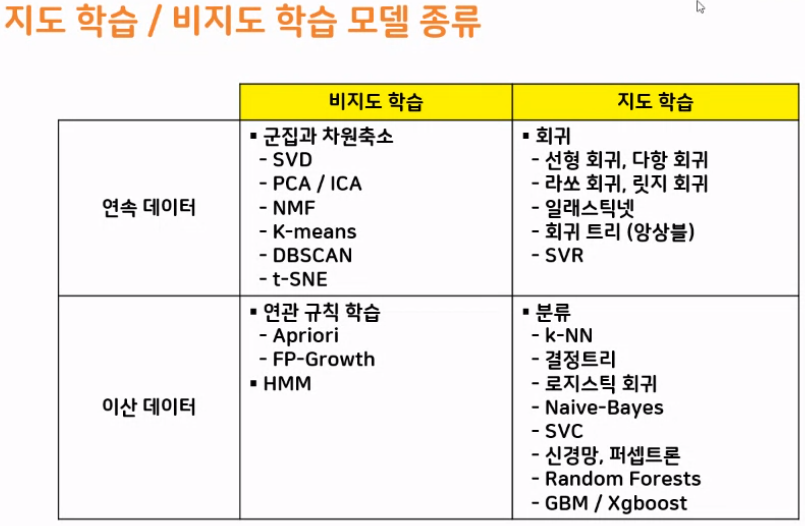

## scikit-learn
- 파이썬에서 쉽게 사용할 수 있는 머신러닝 프레임워크, 라이브러리
- 회귀, 분류, 군집, 차원축소, 특성 공학, 전처리, 교차 검증, 파이프 라인 등 머신러닝에 필요한 기능을 갖춤
- 학습을 위한 샘플 데이터도 제공

#### show-V도 많이 사용

### XOR(eXclusive OR) 연산 학습하기
- 가산기
- 비교기
- 로 많이 사용

#### knn = KNeighborsClassifier(n_neighbors = 1)
#### knn.fit(문제 데이터, 답)      # fit() : 훈련하는 기능
#### 예측한 답 = knn.predict(답을 얻고 문제 데이터)    # 예측하는 함수
#### score = metrics.accuracy_score(실제 답, 예측한 답)     # 정확도 계산, 실제 답과 예측(몇개 맞췄는지)

# Scikit-learn 프레임워크를 활용한 학습
- Scikit-learn 프레임워크 : 머신러닝과 관련된 데이터, 모델, 함수 등을 다양하게 가장 많이 활용된 머신러닝 프레임워크

In [1]:
import pandas as pd

In [2]:
# AND 논리 선언
data = [[0, 0, 0], 
        [0, 1, 0], 
        [1, 0, 0],
        [1, 1, 1]]


# pandas 데이터 (데이터프레임)로 변환
# 컬럼명 (A, B, AND)
df = pd.DataFrame(data, columns = ['A', 'B', 'AND'])
print(df)

   A  B  AND
0  0  0    0
1  0  1    0
2  1  0    0
3  1  1    1


In [28]:
# 특성 데이터와 라벨 데이터로 분리
# 특성 데이터: 여러개니까 '대문자'   /   라벨 데이터: 1개니까 '소문자'로 씀
#X = df[['A','B']]
X = df.loc[:,'A':'B']
#y = df['AND']
y1 = df.loc[:,'AND'] # 이렇게 특성은 슬라이싱, 라벨은 인덱싱하면 안됨(서로 다른 타입의 데이터가 됨)
y = df.loc[:, 'AND':]

In [29]:
print(X)  # DataFrame

   A  B
0  0  0
1  0  1
2  1  0
3  1  1


In [30]:
print(y1)  # 인덱싱으로 자르면 : Series 데이터

0    0
1    0
2    0
3    1
Name: AND, dtype: int64


In [31]:
print(y) # 슬라이싱으로 자르면 : DataFrame

   AND
0    0
1    0
2    0
3    1


In [38]:
# KNN 분류모델 로드
from sklearn.neighbors import KNeighborsClassifier

# 모델 선언
# n_neighbors : 가까이에 있는 참고하는 데이터의 수
knn_model = KNeighborsClassifier(n_neighbors = 1)

# 특성 데이터와 라벨 데이터를 입력해서 훈련 - fit(특성 데이터, 라벨 데이터)
knn_model.fit(X, y)  # 거리기반 방식으로 AND 연산 데이터 학습



C:\Users\AI\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [41]:
# 새로운 데이터를 입력해서 예측
new_X = [[1, 1], [0, 1], [0, 0], [1, 0]]
new_y = [1, 0, 0, 0]

# predict() : 생성된 모델을 이용해서 새로운 특성데이터의 라벨데이터를 예측
pred_y = knn_model.predict(new_X)

pred_y

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, 0], dtype=int64)

In [45]:
# 평가(score, accuracy_score) - 정확도 구하는 함수
# score() : 훈련하고 나서 특성 데이터와 라벨 데이터로 정확도를 계산
# accuracy_score() : 예측한 라벨 과 원래 라벨을 비교하여 정확도를 계산
from sklearn.metrics import accuracy_score

print(knn_model.score(X, y)) # 기존 데이터로 정확도 구하는 함수 100점 : 머신러닝에서는 100점(=1.0)이 나올 경우 과대 접합일 가능성이 큼
print(accuracy_score(pred_y, new_y)) # 새로운 데이터로 정확도를 구하는 함수

1.0
1.0


- 먼저 데이터를 인식해야 하므로 대부분 데이터 분석후, 화살표 표시한 것들을 거의 동시에 함
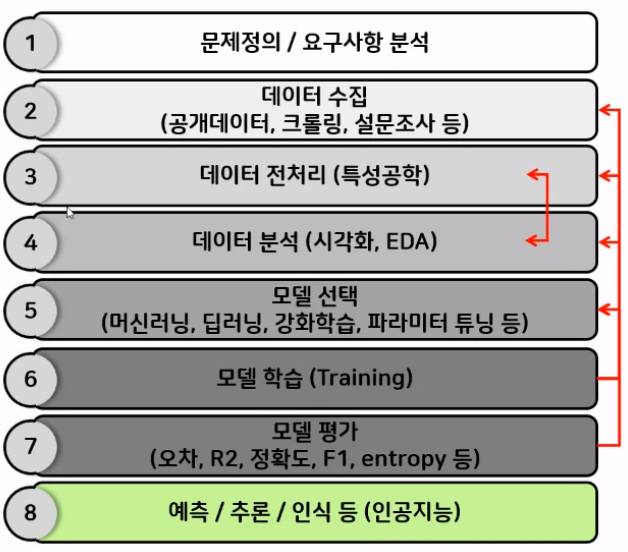

## Data collect(데이터 수집)
 - File(CSV, XML, JSON)
 - Datatbase
 - web Crawlring(뉴스, SNS, 블로그)
 - IoT 센서를 통한 수집
 - Surgvey

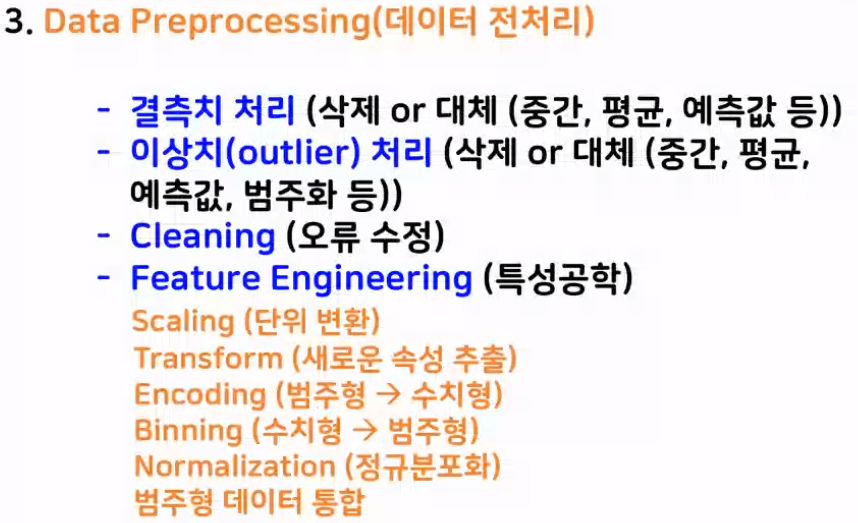

## 데이터 전처리 순서
1. 오류 수정(Cleansing)
2. 이상치(outlier)처리
3. 결측지 처리 : 클러스터링은 결측치 처리
    - 수치형 데이터 : 범주형 데이터로 바꾸는 이유 (나이같은 데이터, 클러스터링으로 정확도 증가)
    - 정규 분포화 : 성별 데이터를 여러 특성으로 더 쪼개서 정규분포처럼 만듦

## EDA(탐색적 데이터 분석)
- 기술 통계, 변수간 상관 관계
- 시각화
    - pandas, matplotlib, seaborn
- Feature Selection(사용할 특성 선택)
    - 특성이 작으면 늘리고, 많으면 줄임

## Matplotlib
- 단변수 시각화 : Histogram(빈도수), Boxplot(평균, 중간값 등)
- 이변수 시각화 : Scatter plot(수치, 상관관계), 누적 막대 그래프(범주, 독립성 분석), 범주별 Histogram
- 다변수 시각화 : Violin plot, 3차원 그래프 등

5. Model 선택, Hyper Parameter 조정(Tunning)
    - 목적에 맞는 적절한 모델 선택
    - KNN, SVM, Linear Regression, Ridge, Lasso, Decision Tree, Random
6. Model Training(학습)
    - model.fit(X_train, y_train)
        - train 데이터와 test 데이터를 7:3 정도로 나눔(or 75% : 25% . 훈련 데이터가 더 많아야 함)
        - train data(훈련 데이터) : 모델을 만드는 데이터
        - test data : 평가하기 위한 데이터
    - model.predict(X_test)
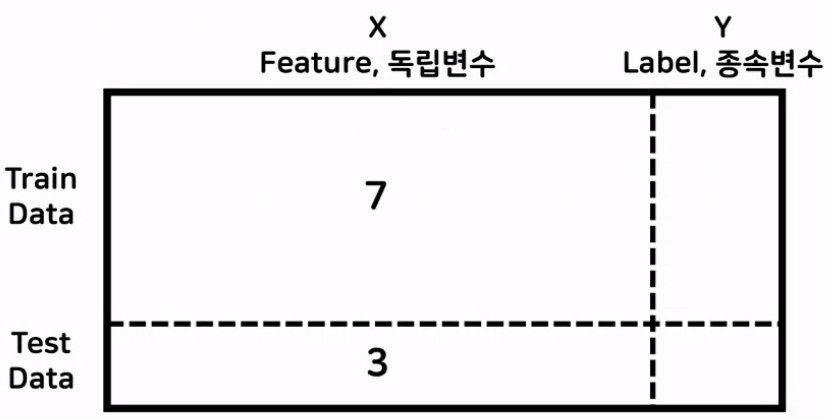

7. Evaluation(평가)
    - MSE / RMSE
    - R2 Score
    - accuracy(정확도)
    - recall(재현율)
    - precision(정밀도)
    - f1 score

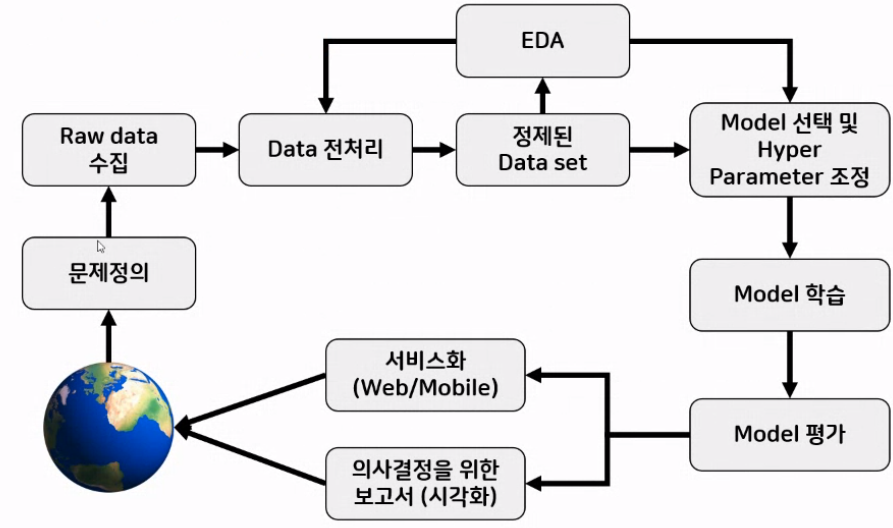
- 통계 데이터를 잘 안쓰는 이유 : 너무 깔끔하게 정제되어 내가 얻고 싶은 결과를 얻을 수 없음
    - 우리는 raw data를 원함

# KNN

## 1. 요구사항 분석 및 문제 정의
- 간단한 EDA와 관련된 함수를 학습
- BMI 데이터를 확인해 보고 잘 분류가 될 수 있는지 시각화
- KNN의 개념에 대해 학습
- KNN을 이용해서 학습
- 머신러닝 프로세스에 대해 학습

## 2. 데이터 수집

In [49]:
# 비만도(BMI) 데이터를 이용해 학습 해보자.
bmi = pd.read_csv('data/bmi_500.csv')
print(bmi)

     Gender  Height  Weight            Label
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
..      ...     ...     ...              ...
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity

[500 rows x 4 columns]


# EDA(탐색적 데이터 분석)

In [51]:
# 처음부터 일부 데이터를 확인
# 괄호 안에 숫자를 입력하면 해당 숫자만큼 출력
print(bmi.head())

# 끝에서 부터 일부 데이터를 확인
print(bmi.tail())

   Gender  Height  Weight       Label
0    Male     174      96     Obesity
1    Male     189      87      Normal
2  Female     185     110     Obesity
3  Female     195     104  Overweight
4    Male     149      61  Overweight
     Gender  Height  Weight            Label
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity


In [52]:
# 데이터의 정보를 출력하는 함수
# 데이터의 수, 컬럼의 특성 - 결측치 확인
# Dtype : object(범주형), int/ float(수치형)
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [61]:
# 범주형 컬럼의 클래스의 목록을 출력하는 함수
print(bmi['Gender'].unique())
print(bmi['Label'].unique())

['Male' 'Female']
['Obesity' 'Normal' 'Overweight' 'Extreme Obesity' 'Weak' 'Extremely Weak']


In [63]:
# value_counts()의 목적 : 데이터가 한쪽으로 치우쳐 있는 확인
print(bmi['Gender'].value_counts())
print()
print(bmi['Label'].value_counts())

Female    255
Male      245
Name: Gender, dtype: int64

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64


In [68]:
# 수치형 데이터의 편향(치우침)을 확인하는 함수
# 0 : 정규분포
# 양수 : 왼쪽으로 치우친 데이터
# 음수 : 오른쪽으로 치우친 데이터
print(bmi['Height'].skew())
print(bmi['Weight'].skew())

-0.12191368980139153
-0.037692236922098034


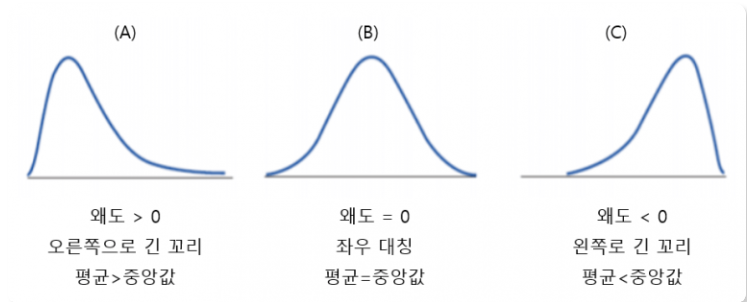

In [71]:
# 데이터의 간단한 기술통계를 보여주는 함수
# 데이터의 개수, 평균, 표준편차, 최소값/ 25%/ 중간값/ 75%/ 최대값
# 결측치/ 이상치/ 편향(치우침 정도) : 평균값과 중간값을 비교하면 됨
# 범주형 데이터를 넣으면 범주형 데이터로 나옴
print(bmi.describe())

           Height      Weight
count  500.000000  500.000000
mean   169.944000  106.000000
std     16.375261   32.382607
min    140.000000   50.000000
25%    156.000000   80.000000
50%    170.500000  106.000000
75%    184.000000  136.000000
max    199.000000  160.000000


# BMI 데이터가 분류가 될 수 있는 데이터인지 확인

In [98]:
# matplotlib : 파이썬 시각화 도구
# seaborn : matplotlib에 고급 시각화 도구를 제공
import matplotlib.pyplot as plt

# scatter : 산포도를 그리는 함수(2차원 자표에 점을 찍는 함수)
# x 좌표 : Weight  / y 좌표 : Height
def myScatter(label, color) :
    # 매개변수로 넘어 온 라벨의 해당 값들을 저장
    tmp = bmi[bmi["Label"] == label]
    
    # 입력한 라벨값만 산포도를 그림
    # scatter(x좌표, y좌표, 색상, 라벨)
    plt.scatter(tmp['Weight'], tmp['Height'], c=color, label = label)
    
    # plt.show() : 여러 그래프를 구분하기 위한 것(안 쓰면 한 곳에 겹쳐서 출력됨. 쓰면 그전 것은 끊어지고 출력됨)

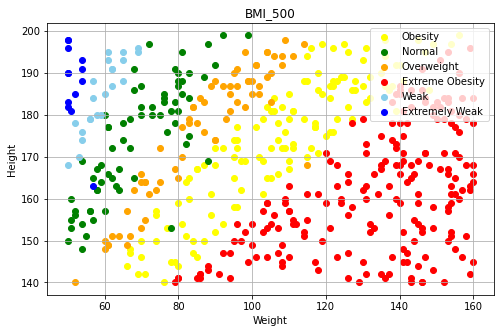

In [126]:
label = ['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak']
color = ['yellow', 'green', 'orange', 'red', 'skyblue', 'blue']

# 그래프의 크기 설정
plt.figure(figsize = (8, 5))

for i in range(len(label)) :
    myScatter(label[i], color[i])
    

# 범례 추가 (loc : 범례 위치)
# loc를 써 주지 않으면 알아서 데이터가 가장 작게 분포된 위치에 표시
plt.legend(loc='upper right')

# x축 라벨 표시
plt.xlabel("Weight")

# y축 라벨 표시
plt.ylabel('Height')


# 제목 표시
plt.title('BMI_500')

# 격자 표시
plt.grid()

plt.show()

#  학습 데이터로 변환
- 특성 데이터와 라벨 데이터로 분리
- 훈련 데이터와 테스트 데이터로 분리

In [132]:
# 특성 데이터와 라벨 데이터로 분리
bmi_X = bmi.loc[:, 'Gender':'Weight']
bmi_y = bmi.loc[:,'Label':]

In [136]:
# 훈련 데이터와 테스트 데이터로 분리(훈련 70%, 테스트 30%)
X_train = bmi_X.iloc[:351, :]
y_train = bmi_y.iloc[:351, :]
X_test = bmi_X.iloc[351:, :]
y_test = bmi_y.iloc[351:, :]
print(len(X_train), len(y_train), len(X_test), len(y_test))

351 351 149 149
